<a href="https://colab.research.google.com/github/buttersaltpepper/Financial-Data-Analytics/blob/main/PortfolioOptimiser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Portfolio Management** was one of my favourite course so after learning Python, it was natural to revisit the course material with coding.

This notebook documents my favourite topis from the course, specifically Value at Risk!😀

# **Content:**
## **1. Visualising Why Portfolio Rebalancing is Important**
## **2. The Efficient Frontier**
## **3. Maximum Sharpe and Minimum Volatility Portfolios**
## **4. Portfolio Risk Models: Value at Risk**


# **Visualising Why Portfolio Rebalancing is Important**
**Using Factor Funds: DVY, MDY, MTUM, QUAL, USMV, VLUE**
* DVY: iShares Select **Dividend** ETF
* MDY: SPDR S&P **MidCap** 400 ETF
* MTM: iShares MSCI USA **Momentum** Factor ETF
* QUAL: VanEck MSCI **International Quality** ETF
* USMV: iShares MSCI USA **Min Vol** Factor ETF
* VLUE: VanEck MSCI **International Value** ETF

In [ ]:
! pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20,10)
import pandas as pd
import yfinance as yf

In [ ]:
factors_df = yf.download('DVY, MDY, MTUM, QUAL, USMV, VLUE')['Adj Close'].dropna()

[*********************100%***********************]  6 of 6 completed


In [ ]:
factors_df.head()

,DVY,MDY,MTUM,QUAL,USMV,VLUE
Date,,,,,,
2013-07-18,49.132156,199.710007,48.403522,43.372158,28.230923,44.043831
2013-07-19,49.219719,199.986099,48.618214,43.034882,28.297649,43.963352
2013-07-22,49.263508,200.662964,48.680817,43.242443,28.305981,44.084064
2013-07-23,49.263508,200.680771,48.600319,43.173248,28.272627,44.084064
2013-07-24,48.884056,199.157883,48.430359,43.112713,28.089151,44.084064


In [ ]:
rets = np.log(factors_df/factors_df.shift(1)).dropna()

In [ ]:
rets = np.array(rets).T
rets.shape

(6, 2316)

In [ ]:
closes = np.array(factors_df).T
closes.shape

(6, 2317)

## **Plotting rebalanced portfolio**

In [ ]:
pval = 10000
equal_weights = np.array([1/len(closes)]*len(closes))

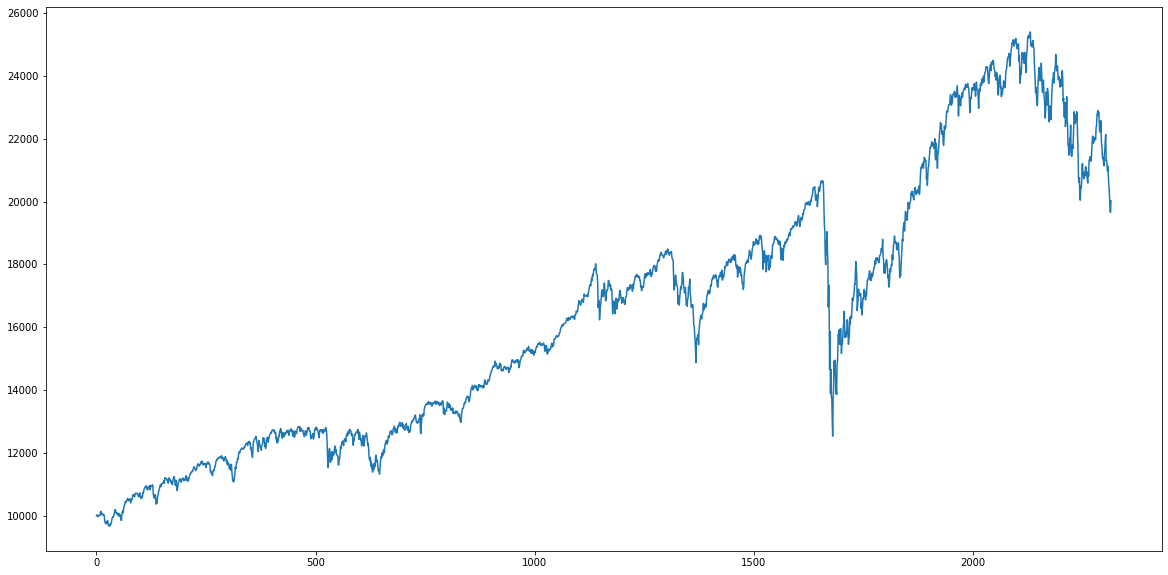

In [ ]:
plt.plot(np.cumprod(np.dot(equal_weights,rets)+1)*pval)
plt.show()

## **Compared to one-time purchase**
* Simulate a one-time purchase with $10,000

In [ ]:
ew_shares = 10000*equal_weights / closes[:,0]
onetime = np.dot(ew_shares,closes)

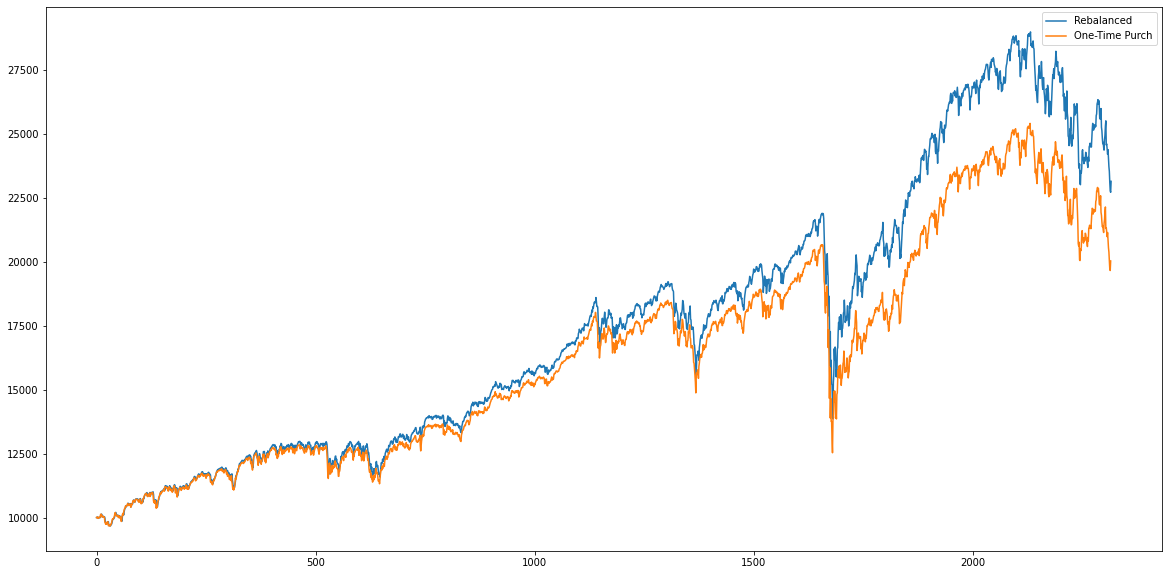

In [ ]:
plt.plot(onetime)

plt.plot(np.cumprod(np.dot(equal_weights,rets)+1)*pval)

plt.legend(['Rebalanced', 'One-Time Purch'])
plt.show()

* the space represents divergence between stocks
* exposure changes

**Final weights in one-time purchase**

In [ ]:
new_pval = (closes[:,-1]*ew_shares).sum()
final_weights = (closes[:,-1]*ew_shares)/new_pval

pd.DataFrame(equal_weights).T

,0,1,2,3,4,5
0,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667


In [ ]:
pd.DataFrame(final_weights).T

,0,1,2,3,4,5
0,0.162522,0.148508,0.199221,0.178659,0.173173,0.137915


**Conclusion**
* Initial Equal Weight was 16.7%.
* Risk Profile changes over time when no balancing is done
* If you have a retirement portfolio plan, you need to rebalance it to avoid deviating away from the plan

# **The Efficient Frontier**
* In modern portfolio theory, the efficient frontier is an investment portfolio which occupies the "efficient" parts of the risk–return spectrum.
* I start off with an equal weighted portfolio and run a Monte Carlo Simulation to create random weighted portfolios to visualise the efficient frontier

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
asset_lists = [
    'IJR', # iShares Core S&P Small-Cap ETF
    'IVV', # iShares Core S&P 500 ETF
    'AGG', # iShares Core U.S. Aggregate Bond ETF
    'IYR', # iShares U.S. Real Estate ETF
    'GLD', # SPDR Gold Shares
    'USO', # United States Oil Fund, LP
    'BTC-USD', # Bitcoin
]



In [ ]:
assets_df = yf.download(asset_lists)['Adj Close'].dropna()
assets_df

[*********************100%***********************]  7 of 7 completed


,AGG,BTC-USD,GLD,IJR,IVV,IYR,USO
Date,,,,,,,
2014-09-17,89.697563,457.334015,117.540001,48.441826,173.461288,54.247066,280.079987
2014-09-18,89.705856,424.440002,117.779999,48.735386,174.371292,53.852165,276.959991
2014-09-19,89.854668,394.795990,117.089996,48.130486,174.165314,53.882538,276.559998
2014-09-22,89.978699,402.152008,116.849998,47.618969,172.894684,53.404091,273.519989
2014-09-23,90.061363,435.790985,117.599998,47.143051,171.941742,53.100311,275.519989
...,...,...,...,...,...,...,...
2022-09-22,97.500000,19413.550781,155.699997,90.344963,375.751831,86.035141,68.970001
2022-09-23,97.199997,19297.638672,153.009995,88.394997,369.514008,84.907005,65.320000
2022-09-26,95.949997,19222.671875,151.229996,87.040001,365.869995,82.610001,63.200001


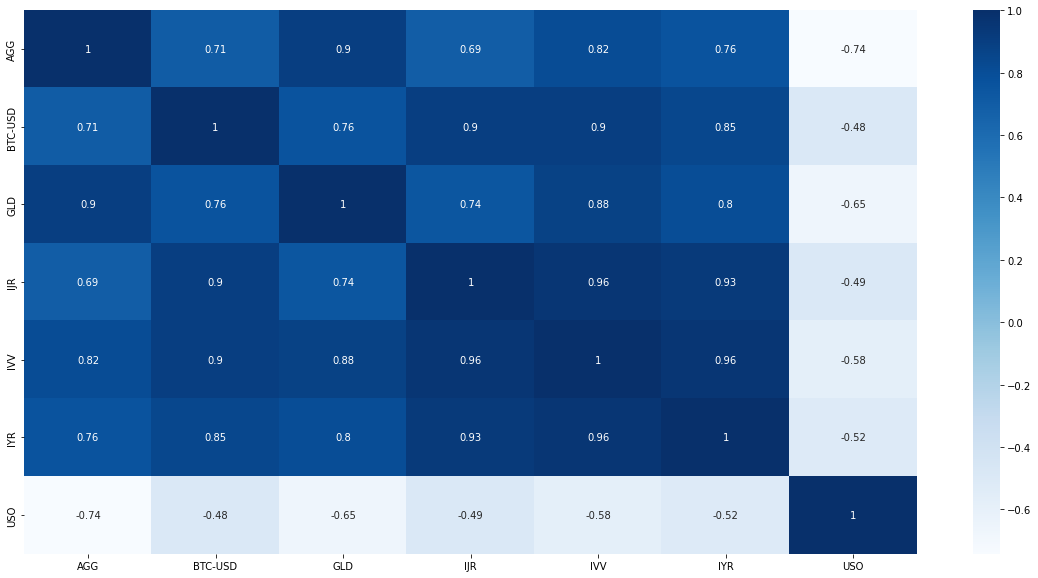

In [ ]:
sns.heatmap(assets_df.corr(), annot=True, cmap='Blues');

In [ ]:
# returns & covariance matrix
def returnscovmatrix(data):
    returns = data.pct_change()
    mu = returns.mean()
    covmatrix = returns.cov()
    return returns, mu, covmatrix

# annualise performance
def portfolioperformance(weights, mu, cov):
    returns = np.sum(mu * weights * 252)
    std = np.sqrt(np.dot(weights.T, np.dot(cov*252, weights)))
    sr = returns/std
    return returns, std, sr

**Generate equal weighted portfolio**

In [ ]:
weights = [1/len(assets_df.columns)]*len(assets_df.columns)
weights /= np.sum(weights)

In [ ]:
returns, mu, cov = returnscovmatrix(assets_df)
(mu*252*100).sort_values(ascending=False)

pd.DataFrame(round(mu*252*100,2), columns=['Annual Return (%)'])

,Annual Return (%)
AGG,1.07
BTC-USD,73.57
GLD,4.42
IJR,10.22
IVV,11.19
IYR,7.40
USO,-8.91


In [ ]:
returns, std, sr = portfolioperformance(weights, mu, cov)

pd.DataFrame([round(returns,2), round(std,2), round(sr,2)], 
             index=['Returns', 'Volatility', 'Sharpe'], columns = ['EW Pf Performance'])

,EW Pf Performance
Returns,0.14
Volatility,0.17
Sharpe,0.83


# **Plotting the Efficient Frontier**

**Simulate portfolios**

In [ ]:
n_portfolios = 20000
results = np.zeros((3+len(mu), n_portfolios)) # 3 rows: return, std, sharpe

for i in range(n_portfolios):
    # make random weights
    weights = np.random.rand(len(mu))
    weights /= np.sum(weights)
    
    # Expected return
    portfolio_return = np.sum(mu * weights * 252)
    
    # Expected volatility
    portfolio_stdev = np.sqrt(np.dot(weights.T, np.dot(cov*252, weights)))
    
    # storing to results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_stdev
    results[2,i] = results[0,i] / results[1,i] # sharpe


    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]
        

In [ ]:
col_names = [i for i in assets_df.columns]
col_names = ['return', 'stdev', 'sharpe'] + col_names
results_df = pd.DataFrame(results.T, columns=col_names)
results_df.head()

,return,stdev,sharpe,AGG,BTC-USD,GLD,IJR,IVV,IYR,USO
0,0.111761,0.184009,0.607368,0.091278,0.096197,0.026318,0.254007,0.110527,0.233686,0.187988
1,0.194964,0.218972,0.890361,0.185417,0.247941,0.139377,0.012298,0.024723,0.215757,0.174488
2,0.045981,0.158644,0.289835,0.209973,0.015034,0.023326,0.151005,0.207312,0.172139,0.221211
3,0.107023,0.183097,0.584512,0.098267,0.106590,0.120416,0.152271,0.242661,0.027344,0.252450
4,0.166949,0.200116,0.834264,0.179087,0.193392,0.064394,0.133660,0.119174,0.126198,0.184095


In [ ]:
# find Max Sharpe Ratio
max_sharpe = results_df.iloc[results_df.sharpe.idxmax()]

# find Min Vol 
min_vol = results_df.iloc[results_df.stdev.idxmin()]

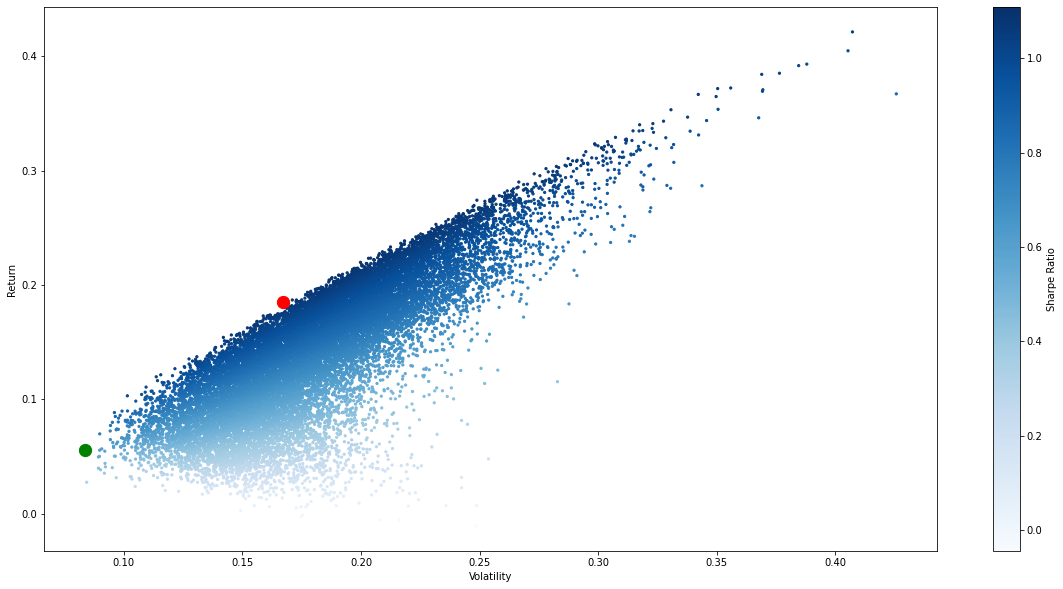

In [ ]:
plt.scatter(results_df['stdev'], results_df['return'],c=results_df['sharpe'],cmap='Blues', s=5)

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sharpe[1], max_sharpe[0], color='r',s=150)
plt.scatter(min_vol[1],min_vol[0], color='g',s=150)

plt.show()

**Portfolio with max sharpe**

In [ ]:
pd.DataFrame(max_sharpe).T

,return,stdev,sharpe,AGG,BTC-USD,GLD,IJR,IVV,IYR,USO
5374,0.184967,0.166907,1.108203,0.248466,0.182656,0.206279,0.043088,0.304562,0.010304,0.004646


**Portfolio with min volatility**

In [ ]:
pd.DataFrame(min_vol).T

,return,stdev,sharpe,AGG,BTC-USD,GLD,IJR,IVV,IYR,USO
16317,0.055848,0.083434,0.669365,0.364697,0.025071,0.34313,0.0158,0.104418,0.111315,0.035568


# **Optimising with  Constraints**
**scipy.optimize -> Maximize Sharpe by minimising negative sharpe**

In [ ]:
import scipy.optimize as sc
from scipy.optimize import Bounds

# get Returns, Volatility, Sharpe Ratio
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(mu * weights * 252)
    vol = np.sqrt(np.dot(weights.T, np.dot(cov*252, weights)))
    sr = (ret-rf) / vol
    return np.array([ret, vol, sr])

# Get negative sharpe (because minimise negative sharpe = maximising sharpe)
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1 # index 2 for Sharpe, also negate it

# Get volatility (will minimise this)
def min_variance(weights):
    return get_ret_vol_sr(weights)[1] # index 1 for volatility # no need to negate as we are minimizing it

# Check if weights = 1
def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1


In [ ]:
asset_lists = [
    'IJR', # iShares Core S&P Small-Cap ETF
    'IVV', # iShares Core S&P 500 ETF
    'AGG', # iShares Core U.S. Aggregate Bond ETF
    'IYR', # iShares U.S. Real Estate ETF
    'GLD', # SPDR Gold Shares
    'USO', # United States Oil Fund, LP
    'BTC-USD', # Bitcoin
]
assets_df = yf.download(asset_lists)['Adj Close'].dropna()

[*********************100%***********************]  7 of 7 completed


In [ ]:
# Define constraints
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1))

# Define risk free rate
rf = 0

**Define weights, mu, covariance matrix, risk free rate**

In [ ]:
# start with equal weight
weights = [1/len(assets_df.columns)]*len(assets_df.columns)
weights /= np.sum(weights)

# Calculate returns, mean returns, covariance matrix
returns, mu, cov = returnscovmatrix(assets_df)

**Run optimisers on Negative Sharpe, and Minimum Volatiltiy**

In [ ]:
cons = ({'type':'eq', 'fun':check_sum})
init_guess = weights


opt_sr_results = sc.minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
opt_vol_results = sc.minimize(min_variance, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

### **Maximum Sharpe Portfolio**

In [ ]:
pf_sr_results = pd.DataFrame(get_ret_vol_sr(opt_sr_results.x)).T
pf_sr_results.set_axis(['Return', 'Volatility', 'Sharpe'], axis=1, inplace=True)

pf_sr_weights = pd.DataFrame(np.round(opt_sr_results.x,3)).T
pf_sr_weights.set_axis([x for x in assets_df.columns], axis=1, inplace=True)

pd.concat([pf_sr_results, pf_sr_weights], axis=1)

,Return,Volatility,Sharpe,AGG,BTC-USD,GLD,IJR,IVV,IYR,USO
0,0.205543,0.183411,1.120669,0.154,0.204,0.263,0.0,0.379,0.0,0.0


### **Minimum Volatility Portfolio**

In [ ]:
pf_vol_results = pd.DataFrame(get_ret_vol_sr(opt_vol_results.x)).T
pf_vol_results.set_axis(['Return', 'Volatility', 'Sharpe'], axis=1, inplace=True)

pf_vol_weights = pd.DataFrame(np.round(opt_vol_results.x,3)).T
pf_vol_weights.set_axis([x for x in assets_df.columns], axis=1, inplace=True)

pd.concat([pf_vol_results, pf_vol_weights], axis=1)

,Return,Volatility,Sharpe,AGG,BTC-USD,GLD,IJR,IVV,IYR,USO
0,0.014859,0.046143,0.32201,0.944,0.0,0.0,0.0,0.049,0.0,0.007


# **Portfolio Risk Management: Value at Risk**
* Once the direction or asset class has been decided, it is always good to look look at the quantitative risk models.
* Value at Risk is the simples and most intuitive model to understand the risk exposure of the portfolio

# **4 types of VaR**🔥
* **VaR** - use historical data
* **Parametric VaR** - use assumptions
* **CVaR** - distribution of losses
* **Monte Carlo** - forward looking

In [ ]:
import seaborn as sns

## 1. Historical Drawdown

In [ ]:
# returns & covariance matrix
def returnscovmatrix(data):
    returns = np.log(data/data.shift(1))
    mu = returns.mean()
    covmatrix = returns.cov()
    return returns, mu, covmatrix

# annualise performance
def portfolioperformance(weights, mu, cov):
    returns = np.sum(mu * weights * 252)
    std = np.sqrt(np.dot(weights.T, np.dot(cov*252, weights)))
    sr = returns/std
    return returns, std, sr

In [ ]:
assets_df.head()

,AGG,BTC-USD,GLD,IJR,IVV,IYR,USO
Date,,,,,,,
2014-09-17,89.697563,457.334015,117.540001,48.441837,173.461380,54.247074,280.079987
2014-09-18,89.705879,424.440002,117.779999,48.735390,174.371323,53.852165,276.959991
2014-09-19,89.854668,394.795990,117.089996,48.130482,174.165253,53.882530,276.559998
2014-09-22,89.978706,402.152008,116.849998,47.618977,172.894699,53.404083,273.519989
2014-09-23,90.061394,435.790985,117.599998,47.143055,171.941803,53.100307,275.519989


In [ ]:
opt_sr_results.x

array([1.53846343e-01, 2.03723943e-01, 2.63221996e-01, 2.37418592e-15,
       3.79207719e-01, 0.00000000e+00, 0.00000000e+00])

In [ ]:
pf_weights = np.array([.55,.45])

In [ ]:
returns, mu, covmatrix = returnscovmatrix(assets_df)
returns = returns.dropna()
weights = opt_sr_results.x

returns['portfolio'] = returns.dot(weights)
returns['cum_ret'] = (1+returns.portfolio).cumprod()-1
returns.head()

,AGG,BTC-USD,GLD,IJR,IVV,IYR,USO,portfolio,cum_ret
Date,,,,,,,,,
2014-09-18,0.000093,-0.074643,0.002040,0.006042,0.005232,-0.007306,-0.011202,-0.012671,-0.012671
2014-09-19,0.001657,-0.072402,-0.005876,-0.012490,-0.001182,0.000564,-0.001445,-0.016490,-0.028952
2014-09-22,0.001379,0.018461,-0.002052,-0.010684,-0.007322,-0.008919,-0.011053,0.000657,-0.028315
2014-09-23,0.000919,0.080333,0.006398,-0.010045,-0.005527,-0.005704,0.007285,0.016095,-0.012675
2014-09-24,-0.000643,-0.029306,-0.004688,0.007936,0.007715,-0.001011,0.016129,-0.004377,-0.016997


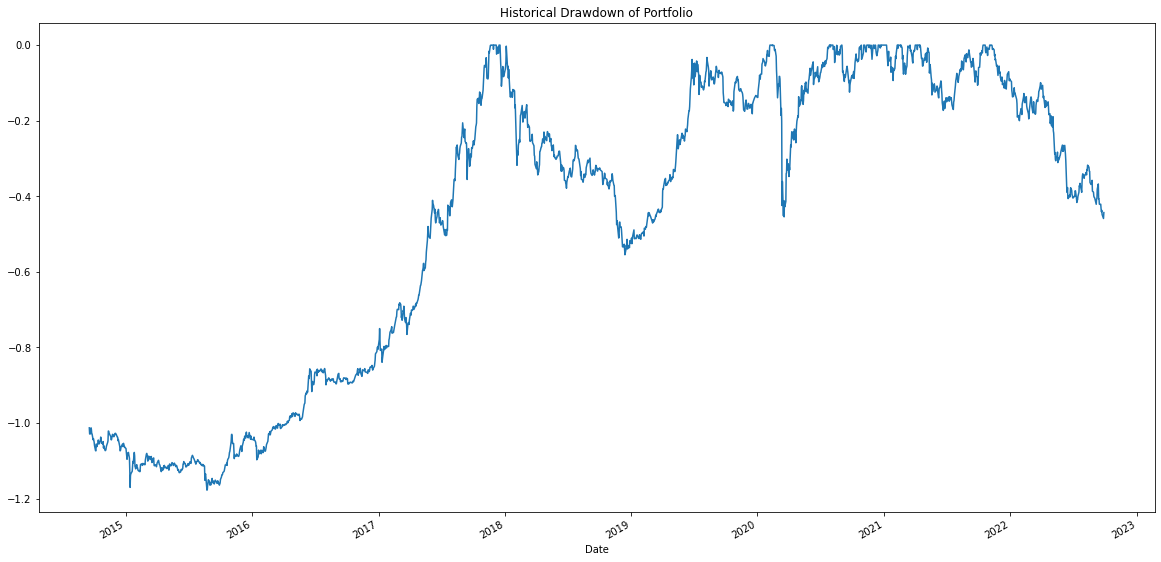

In [ ]:
# Calculate the running maximum
running_max = np.maximum.accumulate(returns.cum_ret)

# Ensure the value never drops below 1
running_max[running_max < 1] = 1

# Calculate the percentage drawdown
drawdown = (returns.cum_ret)/running_max - 1

# Plot the results
drawdown.plot()
plt.title('Historical Drawdown of Portfolio')
plt.show()

# 2. Historical Value at Risk
* assumes distribution of historical lsoses will be the same in future

In [ ]:
alpha = 5

In [ ]:
hist_var = np.percentile(returns.portfolio, alpha)
print('historical VaR: {:.2%}'.format(hist_var))

historical VaR: -1.77%


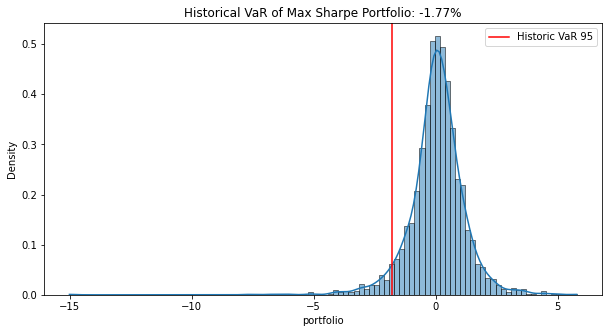

In [ ]:
plt.figure(figsize=(10,5))

sns.histplot(returns.portfolio*100, stat='density',kde=True,bins=100)
plt.axvline(x=hist_var*100, color='r', label='Historic VaR 95')
plt.legend()
plt.title('Historical VaR of Max Sharpe Portfolio: {:.2%}'.format(hist_var))
plt.show()

# 3. Historical Expected Shortfall (CVaR, or Conditional VaR)
* or the expected loss, given losses, the average of losses

In [ ]:
# Slice losses
cvar = returns.portfolio[returns.portfolio <= hist_var].mean()
print('Expected loss: {:.2%}'.format(cvar))

Expected loss: -2.84%


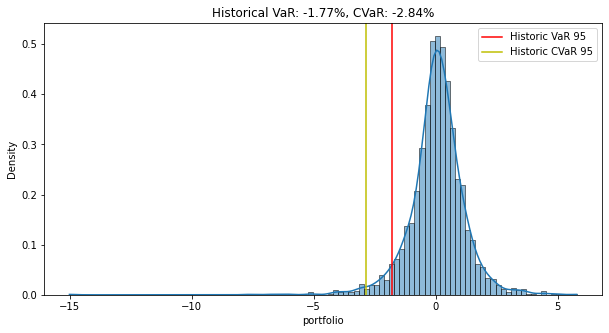

In [ ]:
plt.figure(figsize=(10,5))

sns.histplot(returns.portfolio*100, stat='density',kde=True,bins=100)
plt.axvline(x=hist_var*100, color='r', label='Historic VaR 95')
plt.axvline(x=cvar*100, color='y', label='Historic CVaR 95')
plt.legend()
plt.title(f"Historical VaR: {round(hist_var*100,2)}%, CVaR: {round(cvar*100,2)}%")
plt.show()

# 4. Parametric VaR
**Parametric VaR**
* Describes a distribution based our estimated mean and volatility of portfolio.
* Then finds var from that distributino
* Value at Risk computed parametrically uses a method known as variance/co-variance VaR. 
* This method simulate a range of possibilities based on historical return distribution properties rather than actual return values.

**Calculate Parametric VaR**
* **norm.ppf(confidence_level=0.10, mu, vol)**
where mu and vol are the mean and volatility, respectively.

In [ ]:
# import norm from scipy.stats
from scipy.stats import norm

In [ ]:
# estimate average daily returns
mu = np.mean(returns.portfolio) 
# estimate daily volatility
vol = np.std(returns.portfolio)

In [ ]:
# set confidence level
confidence_level = 0.05

# Calculate Parametric VaR
pVaR = norm.ppf(confidence_level, mu, vol)
print('Parametric VaR: {:.2%}'.format(pVaR))

Parametric VaR: -1.87%


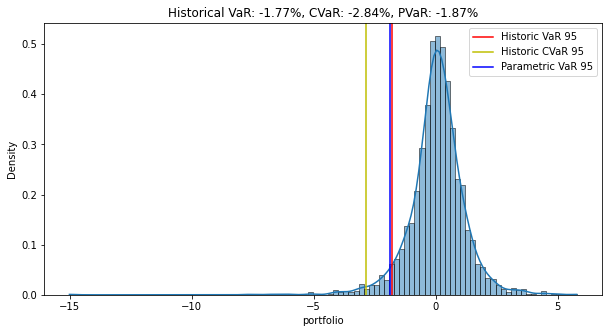

In [ ]:
plt.figure(figsize=(10,5))


sns.histplot(returns.portfolio*100, stat='density',kde=True,bins=100)
plt.axvline(x=hist_var*100, color='r', label='Historic VaR 95')
plt.axvline(x=cvar*100, color='y', label='Historic CVaR 95')
plt.axvline(x=pVaR*100, color='b', label='Parametric VaR 95')
plt.legend()
plt.title(f"Historical VaR: {round(hist_var*100,2)}%, CVaR: {round(cvar*100,2)}%, PVaR: {round(pVaR*100,2)}%")
plt.show()

# 5. Visualising VaR over time
Previous VaR looks at risk for a single time (in this case, t = day)

**To scale VaR:**
$VaR(95)t = VaR(95)t * \sqrt{t}$ 

In [ ]:
hist_var, cvar, pVaR

(-0.01772812352533428, -0.028420799279919792, -0.018669809009744503)

In [ ]:
scaled_vars = np.empty([100,2])

for i in range(0, 100):
    scaled_vars[i,0] = i
    scaled_vars[i,1] = -hist_var*100*np.sqrt(i)

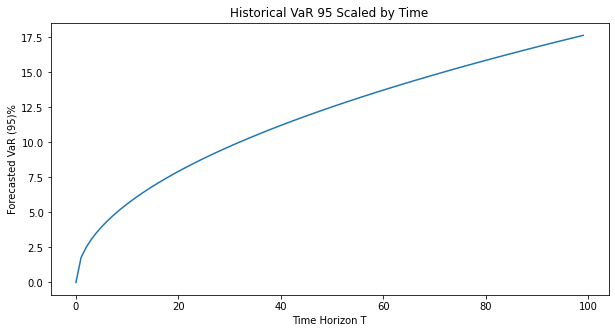

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(scaled_vars[:,0], scaled_vars[:,1])
plt.title('Historical VaR 95 Scaled by Time')
plt.ylabel('Forecasted VaR (95)%')
plt.xlabel('Time Horizon T')
plt.show()

# 6. Monte Carlo Simulating VaR and CVaR
* Stochastic or random movements in mathematics to describe fractal behavior, and in finance to describe stock market movements.
* Aggregate the returns data at each iteration
* Use the resulting values to forecast parametric VaR(95).
* **np.random.normal()** function is used to model random walk movements of the portfolio

In [ ]:
# estimate average daily returns
mu = np.mean(returns.portfolio) 
# estimate daily volatility
vol = np.std(returns.portfolio)
T = 252

In [ ]:
# Aggregate the returns
sim_returns = []

# Loop through 10000 simulations
for i in range(10000):

    # Generate the Random Walk
    rand_rets = np.random.normal(mu, vol, T)
    # Store results
    sim_returns.append(rand_rets)

mc_var = np.percentile(sim_returns, 5)
print("Parametric VaR(95): ", round(100*mc_var, 2),"%")

Parametric VaR(95):  -1.87 %
